In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

In [27]:
dtr = pd.read_csv("/Users/mili/Downloads/Loan_Prediction/traindata.csv")
dte = pd.read_csv("/Users/mili/Downloads/Loan_Prediction/testdata.csv")

In [28]:
dtr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
dte.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# moving on to data pre-processing

In [30]:
print(f"Training Set (row, col): {dtr.shape}\n\nTesting Set (row, col): {dte.shape}")

Training Set (row, col): (614, 13)

Testing Set (row, col): (367, 12)


In [31]:
dtr.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
dte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
# as 'Loan_ID' is not needed we will drop it

In [33]:
dtr.drop('Loan_ID', axis = 1, inplace=True)
dte.drop('Loan_ID', axis = 1, inplace=True)

In [34]:
#checking new size

print(f"Training Set (row, col): {dtr.shape}\n\nTesting Set (row, col): {dte.shape}")

Training Set (row, col): (614, 12)

Testing Set (row, col): (367, 11)


In [36]:
dtr.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
dte.isnull().sum().sort_values(ascending=False)

Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
dtype: int64

In [38]:
dtr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# Each value will be replaced by the most frequent value (mode).
# For example: Credit_History has 50 null values and has 2 unique values 1.0 (475 times) or 0.0 (89 times) 
#therefore each null value will be replaced by the mode 1.0 so now it will show in our data 525 times.

In [46]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    dtr[col] = dtr[col].fillna(dtr[col].dropna().mode().values[0])

dtr.isnull().sum().sort_values(ascending=False)
print("After filling missing values:")
for col in null_cols:
    print(f"\n{col}:\n{dtr[col].value_counts()}\n","-"*50)

After filling missing values:

Credit_History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------

Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------

LoanAmount:
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------

Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------

Loan_Amount_Term:
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------

Gender:
Male      502
Female    112
Name: Gender, dtype: int64
 ----------------------------------------

In [ ]:
# data visualization

In [47]:
# creating a list of all numeric values in the dataset
numeric = dtr.select_dtypes('number').columns.to_list()

# creating a list of all categorical values in the dataset
categorical = dtr.select_dtypes('object').columns.to_list()

lnum = dtr[numeric]
lcat = dtr[categorical]

Y    422
N    192
Name: Loan_Status, dtype: int64


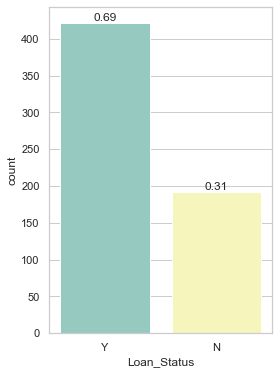

In [64]:
# [-1] prints last element of the sequence
# value_counts returns a series containing counts of unique values

print(dtr[categorical[-1]].value_counts())

total = float(len(dtr[categorical[-1]]))
plt.figure(figsize=(4,6)) # figsize is a tuple of the width and height of the figure in inches
sns.set(style="whitegrid")

# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
ax = sns.countplot(dtr[categorical[-1]], palette='Set3') 

for p in ax.patches:         # Patches are arbitrary two dimensional regions
    height = p.get_height()
    width = p.get_width()
    ax.text(p.get_x()+width/2.,height + 3,'{:1.2f}'.format(height/total), ha="center") 
    
    # get_x() : returns abscissa of current position
    # {:1.2f} : returns value upto 2 decimal places, hence we're formatting (height/total) value to 2 decimal places
    
plt.show()

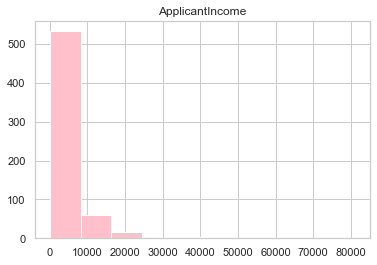

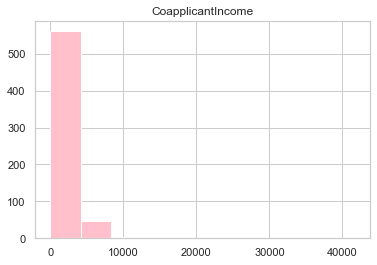

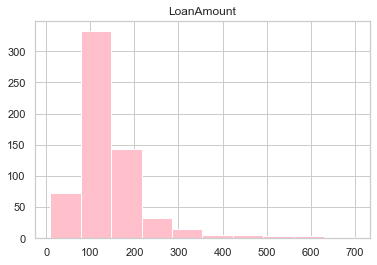

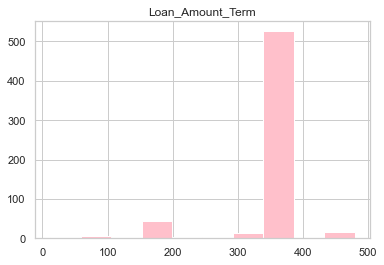

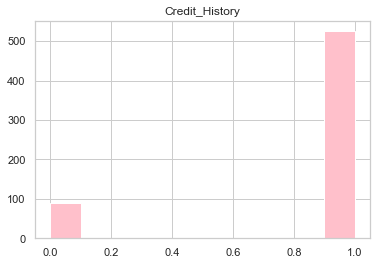

In [63]:
# Plot data

# numeric: 
for i in lnum:
    plt.hist(lnum[i], color='pink')
    plt.title(i)
    plt.show()

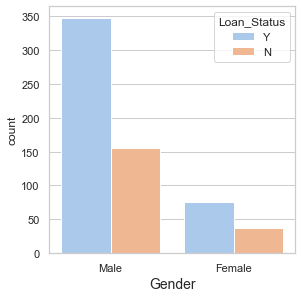

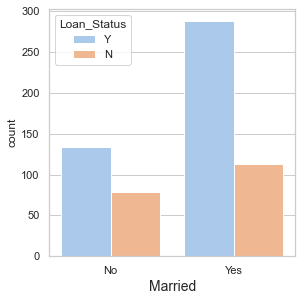

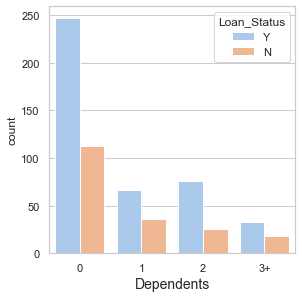

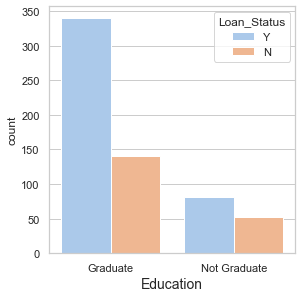

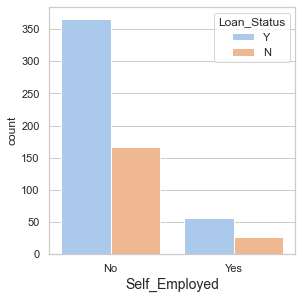

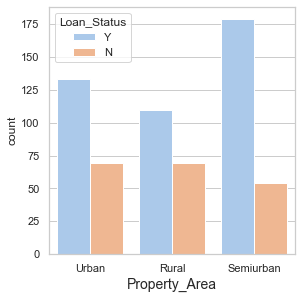

In [65]:
# categorical(split by loan status)

for i in categorical[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=dtr ,palette='pastel')
    plt.xlabel(i, fontsize=14)


In [77]:
# encoding data to numeric

to_numeric = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Graduate': 1, 'Not Graduate': 2, 'Urban': 3, 
              'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0, '3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
# .applymap() method applies a function that accepts and returns a scalar to every element of a DataFrame
# lambda is a function in python that accepts any no. of arguments but can have only one expression

dtr = dtr.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
dte = dte.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# converting the dependents column
Dependents_ = pd.to_numeric(dtr.Dependents)
Dependents__ = pd.to_numeric(dte.Dependents)

# dropping previous dependents column
dtr.drop(['Dependents'], axis=1, inplace=True)
dte.drop(['Dependents'], axis=1, inplace=True)

# concatenating new dependents column with both the datasets
dtr = pd.concat([dtr, Dependents_], axis=1)
dte = pd.concat([dte, Dependents__], axis=1)

print(f"Training Set (row, col): {dtr.shape}\n\nTesting Set (row, col): {dtr.shape}\n")
print(dtr.info())
print("\n")
print(dte.info())

Training Set (row, col): (614, 12)

Testing Set (row, col): (614, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11

In [78]:
dtr.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
0,1,2,1,2,5849,0.0,120.0,360.0,1.0,3,1,0
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0,1
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,1,0
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,1,0
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,1,0


<AxesSubplot:>

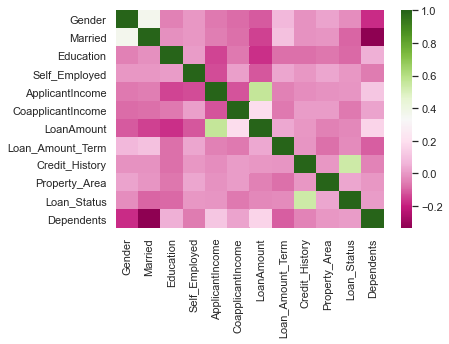

In [80]:
# CORRELATION MATRIX
# plotting the correlation matrix

sns.heatmap(dtr.corr(), cmap = 'PiYG')

In [83]:
# correlation table

corr = dtr.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.00,0.36,-0.05,-0.00,-0.06,-0.08,-0.11,0.07,-0.01,0.03,-0.02,-0.17
Married,0.36,1.00,-0.01,0.00,-0.05,-0.08,-0.15,0.10,-0.01,-0.00,-0.09,-0.33
Education,-0.05,-0.01,1.00,0.01,-0.14,-0.06,-0.17,-0.07,-0.07,-0.07,-0.09,0.06
Self_Employed,-0.00,0.00,0.01,1.00,-0.13,0.02,-0.11,0.03,0.00,0.03,0.00,-0.06
ApplicantIncome,-0.06,-0.05,-0.14,-0.13,1.00,-0.12,0.56,-0.05,-0.02,-0.01,-0.00,0.12
CoapplicantIncome,-0.08,-0.08,-0.06,0.02,-0.12,1.00,0.19,-0.06,0.01,0.01,-0.06,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1.00,0.04,-0.00,-0.05,-0.03,0.16
Loan_Amount_Term,0.07,0.10,-0.07,0.03,-0.05,-0.06,0.04,1.00,-0.00,-0.08,-0.02,-0.10
Credit_History,-0.01,-0.01,-0.07,0.00,-0.02,0.01,-0.00,-0.00,1.00,0.00,0.54,-0.04
Property_Area,0.03,-0.00,-0.07,0.03,-0.01,0.01,-0.05,-0.08,0.00,1.00,0.03,-0.00


In [ ]:
# We can clearly see that Credit_History has the highest correlation with Loan_Status(a +ve correlation of 0.54)
# Therefore our target value is highly dependant on this column

In [ ]:
# MACHINE LEARNING MODELS

# First of all we will divide our dataset into two variables X as the features we defined earlier 
# and y as the Loan_Status, the target value we want to predict.

# Models we will use:
#   Decision Tree
#   Random Forest
#   XGBoost
#   Logistic Regression

# The Process of Modeling the Data:
#   Importing the model
#   Fitting the model
#   Predicting Loan Status
#   Classification report by Loan Status
#   Overall accuracy

In [89]:
y = dtr['Loan_Status']
X = dtr.drop('Loan_Status', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# DECISION TREE CLASSIFIER

In [99]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test) # lets us predict values based on the trained data

print(classification_report(y_test, y_predict))

DT_score = accuracy_score(y_predict,y_test)
print(f"{round(DT_score*100,2)}% Accurate") # round() returns a floating value rounded up to specified decimla point

              precision    recall  f1-score   support

           0       0.37      0.48      0.42        33
           1       0.79      0.70      0.74        90

    accuracy                           0.64       123
   macro avg       0.58      0.59      0.58       123
weighted avg       0.68      0.64      0.66       123

64.23% Accurate


In [97]:
Decision_Tree = pd.DataFrame({'y_test':y_test,' Predicted':y_predict})
Decision_Tree.to_csv("Decision Tree.csv")     

In [103]:
# RANDOM FOREST CLASSIFIER

In [100]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test) # lets us predict values based on the trained data

print(classification_report(y_test, y_predict))

RF_score = accuracy_score(y_predict,y_test)
print(f"{round(RF_score*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.65      0.45      0.54        33
           1       0.82      0.91      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.68      0.70       123
weighted avg       0.77      0.79      0.78       123

78.86% Accurate


In [101]:
Random_Forest = pd.DataFrame({'y_test':y_test,'Predicted':y_predict})
Random_Forest.to_csv("Random Forest.csv")     

In [105]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test) # lets us predict values based on the trained data

print(classification_report(y_test, y_predict))

XGB_score = accuracy_score(y_predict,y_test)
print(f"{round(XGB_score*100,2)}% Accurate")

[12:30:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        33
           1       0.86      0.86      0.86        90

    accuracy                           0.79       123
   macro avg       0.73      0.73      0.73       123
weighted avg       0.79      0.79      0.79       123

78.86% Accurate


In [106]:
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv")     

In [ ]:
# LOGISTIC REGRESSION

In [114]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_score = accuracy_score(y_predict,y_test)
print('Accuracy is', round(accuracy_score(y_predict,y_test)*100,2), "%")

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123

Accuracy is 83.74 %


In [115]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")     

In [116]:
# CONCLUSION

# Credit_History is a very important variable because of its high correlation with Loan_Status therefore
# showing high Dependancy for the latter.
# The Logistic Regression algorithm is the most accurate: approximately 84%.

In [118]:
score = [DT_score,RF_score,XGB_score,LR_score]
Models = pd.DataFrame({'Model': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
3,Logistic Regression,0.837398
1,Random Forest,0.788618
2,XGBoost,0.788618
0,Decision Tree,0.642276
